In [1]:
import zipfile
import os
import pandas as pd

In [1]:
# Path to the zip file
zip_file_path = "OneDrive_2024-09-18.zip"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("extracted_data")  # Specify the extraction folder

# Check the contents of the extracted folder
extracted_files = os.listdir("extracted_data")

NameError: name 'zipfile' is not defined

In [2]:
import pickle

# File paths for all three embeddings
embeddings_files = [
    "extracted_data/GPT embeddings/mcar_beta0_gpt_emb.pickle",
    "extracted_data/GPT embeddings/noise0.6_gpt_emb.pickle",
    "extracted_data/GPT embeddings/mcar_beta0.1_gpt_emb.pickle"
]

# Load all embeddings into a dictionary
embeddings_dict = {}
for file in embeddings_files:
    with open(file, 'rb') as f:
        embeddings_dict[file] = pickle.load(f)


In [3]:
# Step 2: Inspect the structure of the embeddings_dict
for file_key, embedding_data in embeddings_dict.items():
    print(f"File: {file_key}")
    print(f"Type of embedding data: {type(embedding_data)}")
    
    # If it's a dictionary, inspect only the first few keys and their contents
    if isinstance(embedding_data, dict):
        print(f"Number of keys: {len(embedding_data.keys())}")
        sample_keys = list(embedding_data.keys())[:3]  # Inspect only first 3 keys
        print(f"Sample keys: {sample_keys}")
        for sample_key in sample_keys:
            print(f"Sample data for key {sample_key}: {embedding_data[sample_key]}")
    
    # If it's a list, inspect the first few elements
    if isinstance(embedding_data, list):
        print(f"List length: {len(embedding_data)}")
        print(f"First element type in the list: {type(embedding_data[0])}")
        print(f"Sample content: {embedding_data[0]}")
    
    print("\n---\n")


File: extracted_data/GPT embeddings/mcar_beta0_gpt_emb.pickle
Type of embedding data: <class 'dict'>
Number of keys: 10000
Sample keys: [0, 1, 2]
Sample data for key 0: {'seq': [-0.0035435673780739307, -0.04532517120242119, -0.0023048417642712593, -0.010776234790682793, -0.0037195610348135233, -0.029783565551042557, 0.00084400869673118, -0.022703198716044426, -0.010167025960981846, -0.0023437633644789457, 0.01629973202943802, -0.014593946747481823, -0.022973958402872086, 0.012901698239147663, -0.0112703712657094, 0.022608432918787003, -0.04007243365049362, -0.013179227709770203, 0.00738497031852603, 0.035875655710697174, 0.004877058789134026, 0.0037026386708021164, 0.017044322565197945, -0.006701302248984575, 0.013030309230089188, -0.00814986601471901, 0.0284839179366827, 0.02455790340900421, 0.041263774037361145, -0.028592221438884735, 0.006322238594293594, -0.00960520002990961, -0.03184133768081665, -0.01723385415971279, -0.04302371293306351, 0.006373005919158459, -0.0172338541597127

c:\Users\kr3164\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kr3164\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


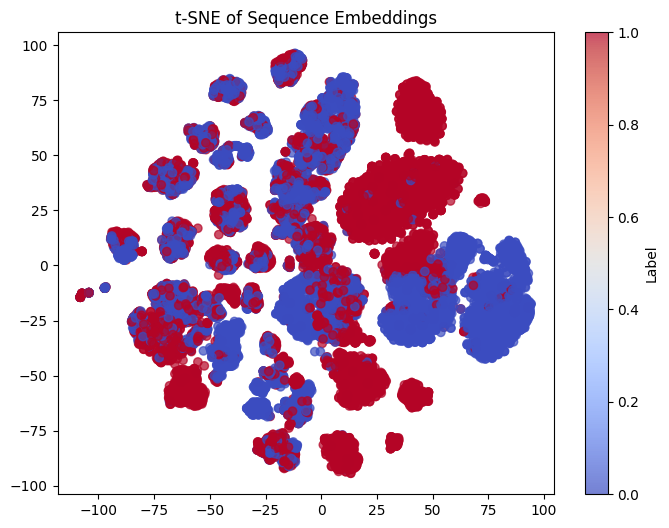

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE



# Now we need to extract embeddings and labels from all files
embeddings = []  # Initialize as a list
labels = []      # Initialize as a list

for file, data in embeddings_dict.items():
    for key in data.keys():
        # Assuming the embedding is stored under 'seq' and the label under 'label'
        embeddings.append(data[key]['seq'])  # Add the embedding for the sequence
        labels.append(data[key]['label'])    # Add the corresponding label (0 or 1)

# Convert embeddings and labels to numpy arrays
embeddings = np.array(embeddings)
labels = np.array(labels)

# Check if embeddings are flattened, and ensure they are a 2D array
if embeddings.ndim == 1:
    embeddings = np.stack(embeddings)

# Perform t-SNE on the embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the t-SNE results, colored by the label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Label')
plt.title('t-SNE of Sequence Embeddings')
plt.show()

In [19]:
def process_tsne(file):
    # Load the embeddings data
    with open(file, 'rb') as f:
        data = pickle.load(f)

    embeddings = []
    labels = []

    # Extract embeddings and labels from the data
    for key in data.keys():
        embeddings.append(data[key]['seq'])  # Add the embedding for the sequence
        labels.append(data[key]['label'])    # Add the corresponding label (0 or 1)

    # Convert to numpy arrays
    embeddings = np.array(embeddings)
    labels = np.array(labels)

    # Perform t-SNE on the embeddings
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Plot the t-SNE results, colored by the label with semi-transparent points
    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='coolwarm', alpha=0.2)
    plt.colorbar(label="Label")
    plt.title(f't-SNE for {file}')
    plt.show()

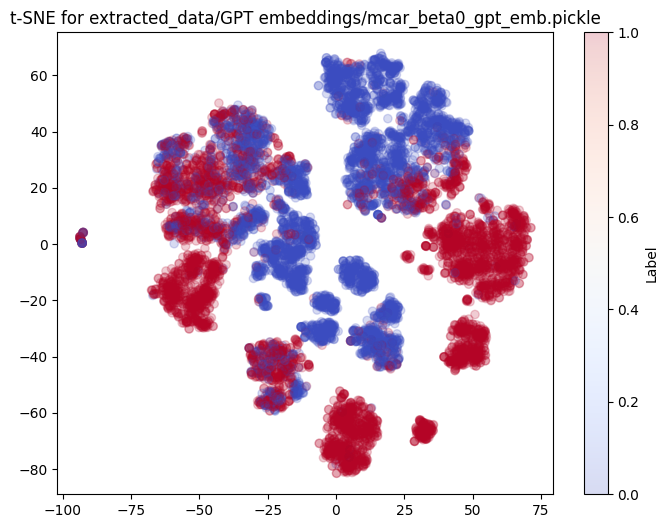

In [20]:
process_tsne('extracted_data/GPT embeddings/mcar_beta0_gpt_emb.pickle')

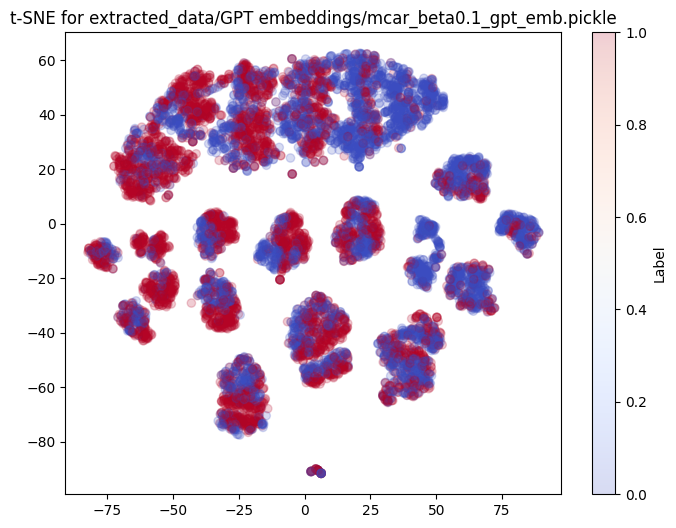

In [21]:
process_tsne('extracted_data/GPT embeddings/mcar_beta0.1_gpt_emb.pickle')

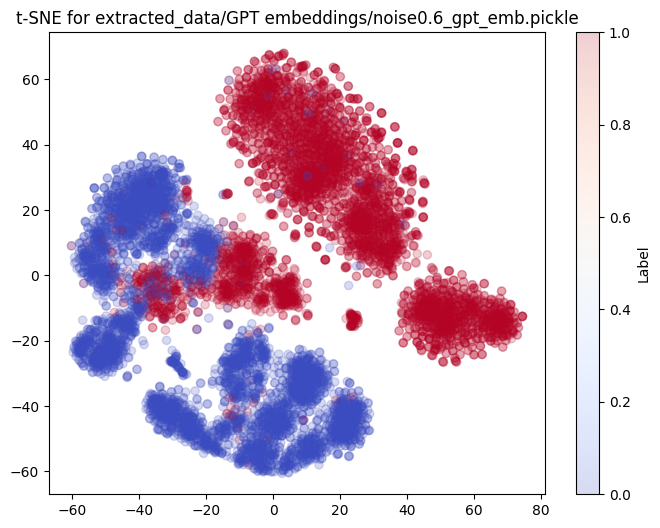

In [22]:
process_tsne('extracted_data/GPT embeddings/noise0.6_gpt_emb.pickle')